## Assignment Week 2 - Biswajit Sharma

The sample dataset for this study is the California housing [dataset][1] from Kaggle (Kaggle n.d.). The dataset contains information about median housing value for city block groups in California from the 1990 California census. There are $10$ variables in the dataset as given below.

- longitude - longitude of the block group
- latitude - latitude of the block group
- housing_median_age - median age of houses in the block group in years
- total_rooms - total rooms in houses of the block group
- total_bedrooms - total bedrooms in houses of the block group
- population - population in the block group
- households - number of households in the block group
- median_income - median income of people in the block group in 10K scale
- median_house_value - median price of houses in the block group
- ocean_proximity - proximity of the block from the ocean front. This a categorical variable with categories: <1H Ocean, Inland, Island, Near Bay and Near Ocean

[1]:https://www.kaggle.com/datasets/camnugent/california-housing-prices

##### Exploration questions

Houses that are near to the oceanfront provide scenic views, aesthetical appeal to buyers, more opportunities for recreation, relaxing, and enjoyable lifestyle. Therefore, it is highly likely that house price near ocean may be higher. The income level of an area may also impact house prices as higher income increases affordability, investment opportunities, and the likelihood of a better neighborhood. This study is focused on exploring the below questions using vizualizations.

 a) _Does the price of houses located inland are lower than houses near the ocean?_

 b) _Does the income of people residing in an area impact house prices for that area?_

In [1]:
# import modules

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
#Read dataset
df = pd.read_csv("./datasets/ca_housing_prices.csv")

In [3]:
# view few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check of NA in columns
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We see `total_bedrooms` column has 207 nulls. However `total_bedrooms` varibale will not be used in this study.

##### Visualizations

In [12]:
# compute average house prices by ocean proximity
avg_price = df.groupby("ocean_proximity").mean()

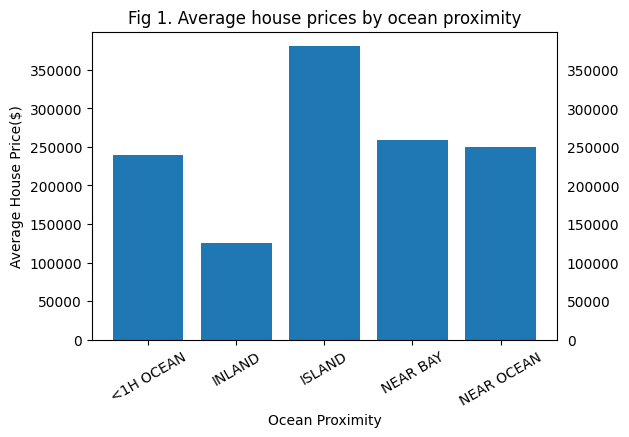

In [13]:
# plot the average price
plt.figure(figsize=(6,4))
plt.tick_params(labelright=True)
plt.bar(avg_price.index, avg_price["median_house_value"])
plt.xlabel("Ocean Proximity")
plt.ylabel("Average House Price($)")
plt.xticks(rotation=30)
plt.title("Fig 1. Average house prices by ocean proximity")

plt.show()

##### Observation
Fig 1 shows that the `average house value` for near ocean houses is higher than the `inland` houses. Houses that are _near ocean_, _near bay area_, and _within 1 hour from ocean_ have similar average prices. The houses located _inland_ have **lowest** average price, while houses located on _island_ have the highest average house price.

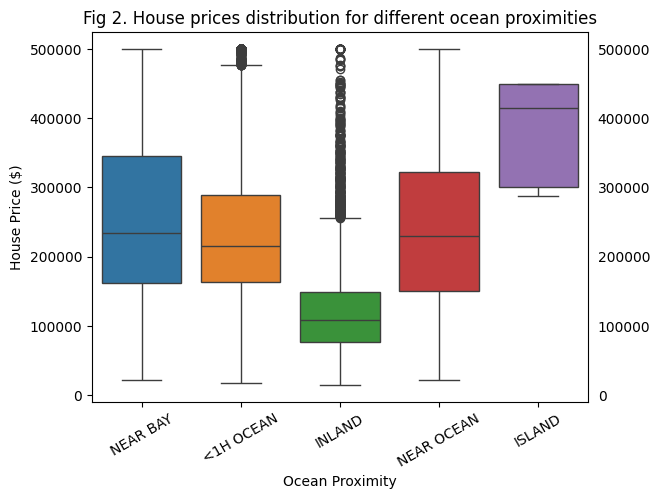

In [14]:
sns.boxplot(x=df["ocean_proximity"], y=df["median_house_value"], hue=df["ocean_proximity"])
plt.tick_params(labelright=True)
plt.title("Fig 2. House prices distribution for different ocean proximities")
plt.ylabel("House Price ($)")
plt.xlabel("Ocean Proximity")
plt.xticks(rotation=30)
plt.show()

##### Observation
Fig 2 shows that the _inland_ houses have **lowest** median value among all the categories. The distribution of `house price` of houses located _near ocean_, _near bay area_, and _within 1 hour from ocean_ are similar, with the median price around $220$K. However, the median `house price` of houses on _island_ is $410$K, which is **highest** median value among all the categories. We also notice that even though $75$% of the _inland_ houses have prices below $150$K, there are _inland_ houses with values as high as 500K, which seem like outliers.

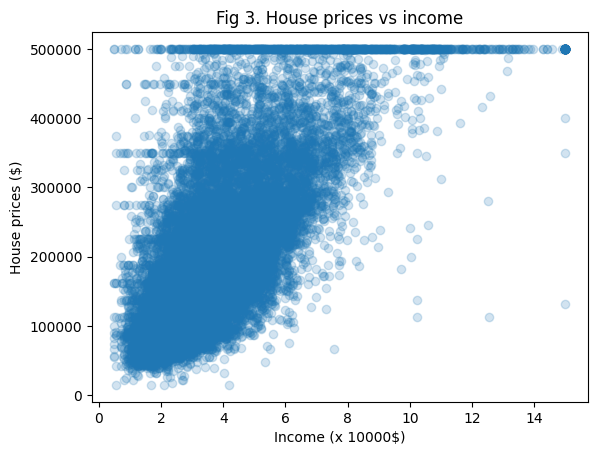

In [15]:
# scatter plot of median income and price
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.2)
plt.title("Fig 3. House prices vs income")
plt.ylabel("House prices ($)")
plt.xlabel("Income (x 10000$)")
plt.show()

##### Observation
From Fig 3, we observe a substantial _positive correlation_ between `house value` and `median income`. **As the `median income` of a block increases, the `median house value` also tends to increase.**

#### Summary

The visualizations show that the average price and median price of the houses in _near ocean_ and _island_ blocks are much higher than those of houses in _inland_ blocks. Hence we can, say that the houses located _near ocean_ tend to have a higher value than those located _inland_. 

It is also observed that as the median income of a block increases the median house value also tends to increase. Therefore, there is a relationship between _median income_ and _median house value_ of a block, but we cannot say that the effect of an increase in house value is caused by higher income based only on the scatterplot. Other methods, like randomized experiments, must be performed to identify such causation.

### References

California Housing Prices (n.d.)._Kaggle_. **https://www.kaggle.com/datasets/camnugent/california-housing-prices**